GNU GENERAL PUBLIC LICENSE<br>
Version 3, 29 June 2007<br><br>

Copyright (C) 2017 MIT<br><br>
Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)

This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.

This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details.

You should have received a copy of the GNU General Public License<br>
along with this program.  If not, see <https://www.gnu.org/licenses/>.

----------------

This notebook demonstrates loading a locally stored ESA Environmental Satellite (Envisat) single look complex (SLC) image

Interferograms may be downloaded at http://web-services.unavco.org/brokered/ssara/api/sar/search?platform=ENVISAT&processingLevel=SLC&output=map&start=2007-01-01&end=2007-03-01

More information about Envisat can be found at https://earth.esa.int/web/guest/missions/esa-operational-eo-missions/envisat

Installation requirement: ESA Snap Python Interface (GPL Licensed)

Download at: http://step.esa.int/main/toolboxes/snap/<br>
Python Installation Instructions: https://senbox.atlassian.net/wiki/spaces/SNAP/pages/19300362/How+to+use+the+SNAP+API+from+Python#HowtousetheSNAPAPIfromPython-StandardPython(CPython)Approach)

Envisat Data provided by European Space Agency

Initial imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
import numpy as np
from skimage.restoration import unwrap_phase
from skimage.measure import block_reduce
import snappy
from skdaccess.utilities.file_browser import FileBrowser

Function to read band data from snap

For more information on the data see https://earth.esa.int/web/sppa/mission-performance/esa-missions/ers-1/sar/products-and-algorithms/products-information

This function is used to retrieve data from SNAP

In [2]:
def snapRetrieveBandData(in_band):
    '''
    Retrieve data from a SNAP band 

    @param in_band: Input band

    @return numpy array from band
    '''
    width = in_band.getRasterWidth()
    height = in_band.getRasterHeight()
    data = np.zeros(width*height,dtype=np.float32)
    in_band.readPixels(0,0,width,height, data)
    data = data.reshape(height,width)
    return data

Access the HashMap which is used to specify parameters for java functions

In [3]:
HashMap = snappy.jpy.get_type('java.util.HashMap')

Download and select path to data

https://va4h02.esa.int/download/ASA_IMS_1P/2007/01/ASA_IMS_1PTDPA20070122_091056_000000162054_00494_25598_9527.N1

In [4]:
filename = FileBrowser()
filename.widget()

Create snappy reader product

In [5]:
read = HashMap()
read.put('file',filename.path)

prod = snappy.GPF.createProduct('Read',read)

Print band names

In [6]:
list(prod.getBandNames())

['i_VV', 'q_VV', 'Intensity_VV']

Retrieve intensity

In [7]:
data = snapRetrieveBandData(prod.getBand('Intensity_VV'))

Downsample using a median smoother

In [8]:
downsampled_data = block_reduce(data, (10,10), np.median);

Display image

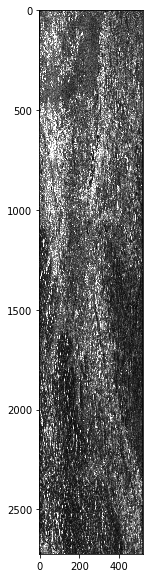

In [9]:
plt.imshow(downsampled_data, cmap='gray',vmin=0, vmax=30000);